# MODELO CLASICO ML

In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [3]:
from tqdm import tqdm
import time

In [4]:
#!pip install yellowbrick

In [4]:
#!pip install shap

## 1. DATASET PARA MODELAR

In [5]:
TOPICOS = [
    "amnistia", # ok
    "feminismo", # ok
    "genero", # ok
    "monarquia", # ok
    "salud", # ok
    "territorio", #ok
    "violencia_genero", #ok
    "vivienda", #ok
    "educacion", # ok
    "economia", # ok
    "inmigracion",
]

In [5]:
topic = TOPICOS[10]
print("Topico elegido", topic)


NameError: name 'TOPICOS' is not defined

In [6]:
def get_labeled_comments(topic):
    df_a_clasificar = pd.read_csv(f"comentarios_{topic}_a_clasificar.csv")
    df_clasificado = pd.read_csv(f"comentarios_{topic}_clasificado.csv")
    df = df_clasificado.merge(df_a_clasificar, on="index")
    return df

In [7]:
dfs = []
for topic in TOPICOS:
    try:
        dfs.append(get_labeled_comments(topic))
    except Exception:
        print("Topic not found", topic)
        continue
    
df = pd.concat(dfs)

NameError: name 'TOPICOS' is not defined

In [8]:
df = pd.read_csv('comentarios_todos_modelar.csv') 

In [9]:
# Limpiar nombres de columnas eliminando espacios al principio o al final
df["category"] = df["category"].str.strip()

# Reemplazar los nombres de las categorías
df["category"] = df["category"].str.replace("ideologia politica", "ideología política")
df["category"] = df["category"].str.replace("ideologia_politica", "ideología política")
df["category"] = df["category"].str.replace("ideologia política", "ideología política")
df["category"] = df["category"].str.replace("xenofobia", "racismo")
df["category"] = df["category"].str.replace("machismo", "machismo")
df["category"] = df["category"].str.replace("mmachismo", "machismo")
df["category"] = df["category"].str.replace("machismo", "machismo")
df["category"] = df["category"].str.replace("achismo", "machismo")
df["category"] = df["category"].str.replace("homofobia", "machismo")
df["category"] = df["category"].str.replace("aporofobia", "racismo")
df["category"] = df["category"].str.replace("racismo", "racismo")
df["category"] = df["category"].str.replace("religion", "racismo")
df["category"] = df["category"].str.replace("religión", "racismo")
df["category"] = df["category"].str.replace("NADA", "No definido") 
df["category"] = df["category"].str.replace("nada", "No definido")

In [11]:
df['category'].value_counts()

ideología política    357
racismo               337
mmachismo             314
Name: category, dtype: int64

### 1.1 CREAMOS LA DATA DE VALIDACION 

COMENTARIOS CRUDOS

In [12]:
df_a_clasificar = pd.read_csv(f"comentarios_vivienda_a_clasificar.csv")
# df_clasificado = pd.read_csv(f"comentarios_vivienda_clasificado.csv")
# df_validation = pd.concat([df_a_clasificar, df_clasificado], ignore_index=False)
    

FileNotFoundError: [Errno 2] No such file or directory: 'comentarios_vivienda_a_clasificar.csv'

In [13]:
df_a_clasificar.head()

NameError: name 'df_a_clasificar' is not defined

In [14]:
df_a_clasificar.to_csv(f"comentarios_validacion_modelo.csv")

NameError: name 'df_a_clasificar' is not defined

COMENTARIOS STEMIZADOS

In [4]:
df_8 = pd.read_csv(f"comentarios_vivienda_stem_a_concatenar.csv")

In [20]:
df_8.shape

(109, 2)

In [22]:
df_8.to_csv(f"comentarios_stem_validacion_modelo.csv")

## 1.2 ANALISIS DE DATASET DE MODELAR  

####  1.2.1 BALANCE DE CLASES

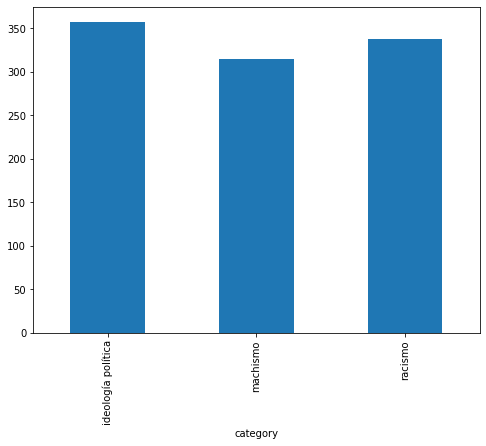

In [211]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_mod.groupby('category').comment.count().plot.bar(ylim=0)
plt.show()

# 2. MODELADO 


### 2.1 BUSQUEDA DE LOS MEJORES MODELOS

In [10]:
import nltk
stopwords = nltk.corpus.stopwords.words('spanish')

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(
    sublinear_tf=True,
    min_df=5,
    norm='l2',
    encoding='utf-8',
    ngram_range=(1, 2),
    stop_words=stopwords
)
features = tfidf.fit_transform(df.comment).toarray()
labels = df.category


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(
    df['comment'], 
    df['category']
)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

/Users/usuario/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/usuario/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/usuario/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/usuario/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/usuario/a

NameError: name 'plt' is not defined

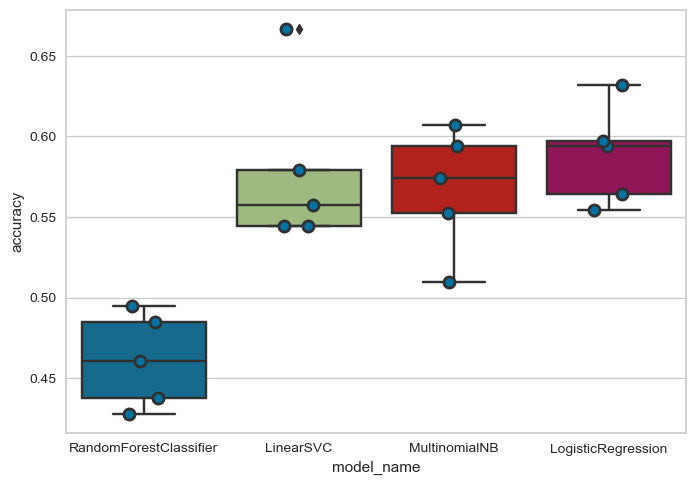

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
      
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [ ]:
cv_df

### 2.2 ENTRENAMIENTO DE MODELO

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC 
import numpy as np


# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['comment'], df['category'], test_size=0.2)

vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_train_vectorized=X_train_vectorized.toarray()
X_test_vectorized = vectorizer.transform(X_test) 
X_test_vectorized=X_test_vectorized.toarray()

# Entrenamiento del modelo
model = SVC()  
model.fit(X_train_vectorized, y_train)


print("Parámetros del modelo SVM:")
print(model.get_params())

# Evaluación del modelo
accuracy = model.score(X_test_vectorized, y_test)
print(f'Precisión del modelo único: {accuracy}')

Parámetros del modelo SVM:
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Precisión del modelo único: 0.6633663366336634


### 2.3 GUARDAMOS EL MODELO CON PIPELINE

In [37]:
from sklearn.pipeline import Pipeline

In [38]:
# Definir el pipeline
pipeline_svc = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svc', SVC()),
])
#utilizamos solamente 300 estimadores para agilizar el proceso durante la clase

In [39]:
pipeline_svc.predict(['Los musulmanes no se acoplan y hay que expulsarlos de España solo vienen a po la paguita y a delinquir esta demostrado las cárceles Españolas solo hay este tipo de gente y eso lo dijo un jefe de policía y resulta que es una realidad'])

NotFittedError: The TF-IDF vectorizer is not fitted

In [40]:
X_test

701                                                                                                                                                                                                                                                                                                                                                                                                                                                        Estas feminazis quieren igualdad y ponen leyes desiguales.LOCAS
500                                                                                                                                                                              He cotizado gran parte de mi vida y nunca he tomado una licencia médica. Han subsidiado la sinvergüenzura de weones sanos, extranjeros, y flojos que llevan años con licencia y probablemente el día que yo tenga la necesidad de atenderme por el sistema de salud que me ha robado mes a mes me van a atender como la reve

In [41]:
pipeline_svc.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', SVC())])

In [42]:
# como guaradr un modelo 
import pickle 

with open("SVC_model.pkl", "wb") as cualquier_variable:
    pickle.dump(pipeline_svc, cualquier_variable) 

In [43]:
import pickle

In [44]:
# Cargar el modelo guardado
with open("SVC_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

In [45]:
predictions = loaded_model.predict(X_test)

In [46]:
loaded_model.predict(['Los musulmanes no se acoplan y hay que expulsarlos de España solo vienen a po la paguita y a delinquir esta demostrado las cárceles Españolas solo hay este tipo de gente y eso lo dijo un jefe de policía y resulta que es una realidad'])

array(['ideología política'], dtype=object)

### 2.4 METRICAS DEL MODELO

In [47]:
# Realizar predicciones en el conjunto de prueba

predicted = pipeline_svc.predict(X_test)

print(classification_report(y_test, predicted))

                    precision    recall  f1-score   support

ideología política       0.61      0.51      0.56        74
         mmachismo       0.65      0.78      0.71        65
           racismo       0.74      0.71      0.73        63

          accuracy                           0.66       202
         macro avg       0.67      0.67      0.66       202
      weighted avg       0.66      0.66      0.66       202



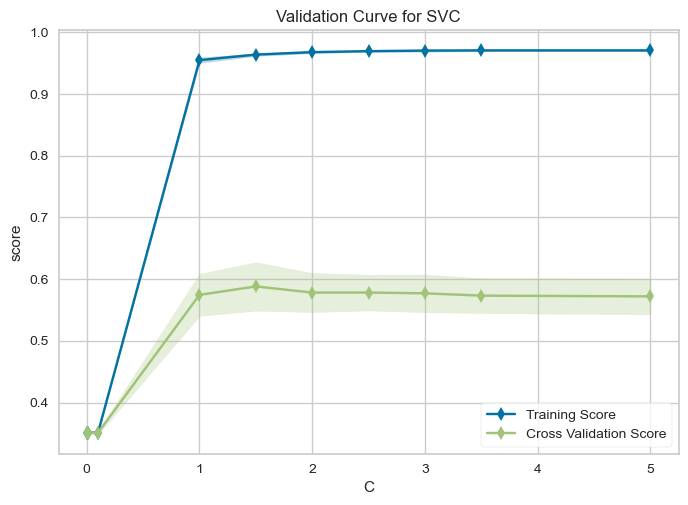

<Axes: title={'center': 'Validation Curve for SVC'}, xlabel='C', ylabel='score'>

In [49]:
from yellowbrick.model_selection import ValidationCurve

param_range = [0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 3, 3.5, 5]
cv = ValidationCurve(
    SVC(kernel='linear'), param_name="C", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=8
)

cv.fit(X_train_vectorized, y_train)
cv.show()

In [27]:
from sklearn.metrics import confusion_matrix
# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test_vectorized) 
# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[41 15 16]
 [15 37  8]
 [24  3 43]]


In [28]:
y.unique()

NameError: name 'y' is not defined

In [29]:
# Etiquetas de las clases
classes = ['ideología política', 'racismo', 'machismo']

# Crear figura y ejes
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.coolwarm)
plt.title('Matriz de Confusión')
plt.colorbar()

# Añadir etiquetas
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Anotar valores en los bloques de la matriz
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Clase Verdadera')
plt.xlabel('Clase Predicha')

plt.show()

NameError: name 'plt' is not defined

In [30]:
#pip install shap


In [31]:
import shap

In [32]:
 pipeline_svc_1 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svc', SVC(kernel='linear', probability=True)),  # Definir el kernel como lineal y activar la probabilidad
])

In [33]:
pipeline_svc_1.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('svc', SVC(kernel='linear', probability=True))])

In [34]:
explainer = shap.Explainer(pipeline_svc_1.predict_proba, X_train)

In [35]:
shap_values = explainer.shap_values(X_test_vectorized)

IndexError: tuple index out of range

In [ ]:
print(explainer)

In [ ]:
import shap
# Crear el explainer usando KernelExplainer
explainer = shap.Explainer(pipeline_svc_1.predict_proba, X_train)

# Obtener los valores SHAP para los datos de prueba
shap_values = explainer.shap_values(X_test)

# Crear gráficos o visualizaciones con shap_values según tus necesidades
# Por ejemplo, un resumen global de los SHAP values
shap.summary_plot(shap_values, X_test)

## 3. VALIDACION DE MODELO 

### 3.1 VALIDACION CON COMENTARIOS CRUDOS 

In [52]:
from tqdm import tqdm
# from tqdm.auto import tqdm  # for notebooks

# Create new `pandas` methods which use `tqdm` progress
# (can use tqdm_gui, optional kwargs, etc.)
tqdm.pandas()

In [166]:
df_comment_validation = pd.read_csv(f"comentarios_validacion_modelo.csv")

In [167]:
# Cargar el modelo guardado
with open("SVC_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

In [50]:
loaded_model.predict(["mejor pelear solucionar jodido precio alto espa trabajamo comer compramo aceit oliva primer productor aceituna mundo euro litro mismo tiempo unido cobra aceit oliva importado espa alto impuesto aduana mismo tiempo precio alcohol mismo quieren emborrachar respons guerra ucrania rusia pido creer mentira americana inglesa	"])

array(['mmachismo'], dtype=object)

In [168]:
df_comment_validation['comment'] = df_comment_validation['comment'].apply(lambda x: [x])

In [169]:
def asignar_categoria(elemento):
    if isinstance(elemento, list):
        resultado = loaded_model.predict(elemento) 
        categoria_predicha = resultado[0]
        
    return categoria_predicha

# Aplicar la función a la columna 'comment' y crear una nueva columna 'category'
df_comment_validation['category'] = df_comment_validation['comment'].progress_apply(lambda x: asignar_categoria(x))

100%|███████████████████████████████████████████████████████████████████████████████| 190/190 [00:00<00:00, 729.81it/s]


In [170]:
df_comment_validation['category'].value_counts()

ideología política    91
racismo               58
machismo              41
Name: category, dtype: int64

In [171]:
df_comment_validation.shape

(190, 4)

#### 3.1.1 PRUEBAS CON DATASET DESCONOCIDO

In [172]:
df_otro = pd.read_csv(f"comentarios_amnistia_a_clasificar.csv")

In [173]:
df_otro['comment'] = df_otro['comment'].apply(lambda x: [x])

In [174]:
df_otro['category'] = df_otro['comment'].progress_apply(lambda x: asignar_categoria(x))

100%|███████████████████████████████████████████████████████████████████████████████| 191/191 [00:00<00:00, 698.61it/s]


In [175]:
df_otro['category'].value_counts()

ideología política    92
machismo              54
racismo               45
Name: category, dtype: int64

In [176]:
df_otro.shape

(191, 3)

#### 3.1.2 PRUEBA CON DATASET MAS GRANDE FILTRADO POR NEGATIVOS 

In [183]:
df_negativos = pd.read_csv("comentarios_amnistia_etiquetado.csv")

In [184]:
df_negativos['comment'] = df_negativos['comment'].apply(lambda x: [x])

In [185]:
df_negativos['category'] = df_negativos['comment'].progress_apply(lambda x: asignar_categoria(x))

100%|█████████████████████████████████████████████████████████████████████████████| 8305/8305 [00:10<00:00, 810.71it/s]


In [186]:
df_negativos['category'].value_counts()

ideología política    5980
machismo              1757
racismo                568
Name: category, dtype: int64

In [187]:
df_negativos.shape

(8305, 14)

#### 3.1.3 PRUEBA CON MAS GRANDE SIN FILTROS 

In [188]:
df_otro_mas_grande = pd.read_csv(f"comentarios_amnistia_sentimiento.csv")

In [189]:
df_otro_mas_grande['comment'] = df_otro_mas_grande['comment'].apply(lambda x: [x])

In [190]:
df_otro_mas_grande['category'] = df_otro_mas_grande['comment'].progress_apply(lambda x: asignar_categoria(x))

100%|███████████████████████████████████████████████████████████████████████████| 11908/11908 [00:14<00:00, 827.98it/s]


In [191]:
df_otro_mas_grande['category'].value_counts()

ideología política    7935
machismo              3264
racismo                709
Name: category, dtype: int64

In [192]:
df_otro_mas_grande.shape

(11908, 9)

#### 3.1.4 PRUEBAS CON MENTARIOS AL AZAR

In [ ]:
loaded_model.predict(["pue creo explicar bola vigilen dice enga saben"])

In [ ]:
df_grande_stem['comment_stem'][8457]

In [ ]:
loaded_model.predict(['interesant poner evidencia carencia ofrecen sistema educativo orientado alcanzar media efecto princip supon normativizar precisi milim trica comportamiento respuesta alumno anulaci personalidad individualidad hannah arendt libro banalidad misma forma revela efecto catastr fico rdida consciencia individuo marcialidad pued productiva control alumnado consideran espacio aprendizaj embargo precio pagar empobrecimiento cancelaci aquello destaca difier masa aquello hace insustitu podemo promov sistema provoca alumno conviertan conglomerado suscept comportars masa mismo ortega tambi alertaba peligro meno sociedad cita nunca conseguido ubicar vien colaci nacemo original mueren fotocopia tremendament habitu encontrarno caso refuerza negativo amenaza desesperanza dentro aula part docent cada maestrillo librillo debe encontrar rmula acallar inercia masa provocar resplandor originalidad individu'])